In [1]:
import cairo, argparse,copy,math,random, itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Polygons filled with circles, no overlapping

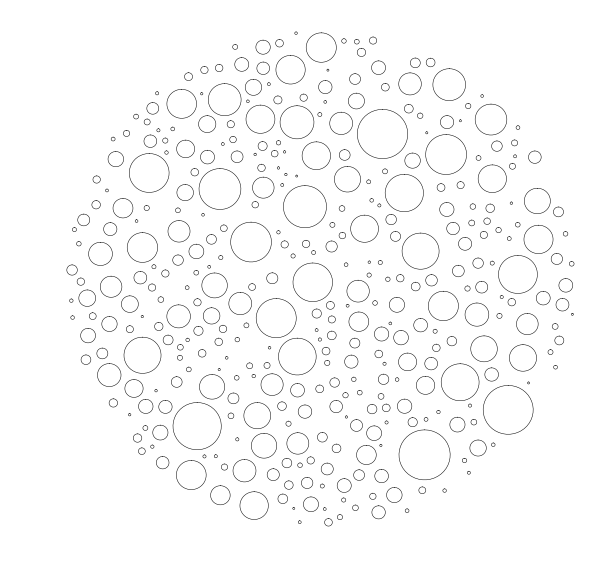

In [116]:
poly = Polygon(Circle([0,0],500).points[:-1])

#Fill polygon with larger circles
rMin=2
rMax= 50
spacing = 10
nbCircles = 500
nbIter = 10000

circles =[]
circles =poly.fillPolygon(rMin,rMax,spacing,nbCircles,nbIter,circles)

plt.figure(figsize=(10,10))
for c in circles:
    plt.plot(c.points[:,0],c.points[:,1],'k-',lw=0.5)
plt.axis('off')
plt.show()

## Main methods

In [2]:
def randomArray(vMin,vMax,dim):
    #random array scaled with pMin pMax and of chosen dimension
    if isinstance(vMin, int)|isinstance(vMin, float):
    
        points = vMin+(vMax-vMin)*np.random.rand(dim,1)
    
    else:
        
        points = vMin+(vMax-vMin)*np.random.rand(dim,len(vMin))
    return points   

In [3]:
def dist(pt1,pt2):
    #distance between 2points
    
    return np.sqrt(np.sum((np.array(pt1) - np.array(pt2))**2))

In [10]:
def distClosestCircle(circle, listCircles,spacing):
    #test the distance between circles and return the minimum

    if len(listCircles) ==0 :
        return circle.radius + spacing
        
    else :
        minDistance = np.min([(dist(circle.center,c.center)-c.radius-spacing) for c in listCircles])
        return minDistance

## Classes 

In [74]:
class Polygon:
    #define a Polygon by its points, regular or random
    #methods to fill the polygon by circles of various size
    
    def __init__(self,points):
        self.polygon = np.vstack([np.array(points),np.array(points)[0]])
        
        
    def fillPolygon(self,rMin,rMax,spacing,nbCircles,nbIter,listCircles=[]):
        #Fill Polygon with circles with random origin and radius with no overlapping
        
        pMin = np.min(self.polygon,axis=0)
        pMax = np.max(self.polygon,axis=0)

        i = 0
        
        while(i<nbIter)&(len(listCircles)<=nbCircles):
            #limit the list size and the iteration number
            
            circle = Circle(randomArray(pMin,pMax,1),randomArray(rMin,rMax,1))
            distClosest = distClosestCircle(circle, listCircles,spacing)
            
            if (distClosest > circle.radius) & self.inPolygon(circle):
                listCircles.append(circle)
                
            else :
                i +=1
                
        return listCircles
        
    def inPolygon(self,circle):
        #Check if the circle is in the polygon
        
        return np.array([self.wnPoly(pt) for pt in circle.points]).all()
    
    def wnPoly(self,point):
        #return True for point inside the polygon, False for outside
        
        wn = 0 
        for vert1,vert2 in zip(self.polygon,self.polygon[1:]): #Vertices of the polygon side by side
            if (vert1[1]<= point[1])&(vert2[1]> point[1])&(Polygon.isleft(point,vert1,vert2)):
                wn +=1
            elif (vert1[1]> point[1])&(vert2[1]<= point[1])&(not Polygon.isleft(point,vert1,vert2)):
                wn -=1
                
        return wn!=0
    
    def isleft(pt,ptA,ptB):
        # True if pt is left of (False if right of or on)  the line throught (ptA,ptB)
        
        return ((ptB[0]-ptA[0])*(pt[1]-ptA[1])-(pt[0]-ptA[0])*(ptB[1]-ptA[1]))>0
    
    def cnPoly(self,point):
        #second method to check if a point belong in a polygon
        cn = 0
        for vert1,vert2 in zip(self.polygon,self.polygon[1:]): #Vertices of the polygon side by side
            if ((vert1[1]<= point[1])&(vert2[1]> point[1]))|((vert1[1]> point[1])&(vert2[1]<= point[1])):
                vertex = (point[1]-vert1[1])/(vert2[1]-vert1[1])
                if point[0] < vert1[0] + vertex*(vert2[0]-vert1[0]):
                    cn +=1
                    
        return cn%2==1 # True if inside (odd), False if out (even)

In [25]:
class Circle:
    
    def __init__(self,center,radius):
        self.center = np.array(center)
        self.radius = radius
        self.points = self.regularPolygon(41)
        
    def regularPolygon(self,nbSides):
        return self.center+self.radius*np.array([(np.sin(2*n*np.pi/nbSides),np.cos(2*n*np.pi/nbSides)) for n in range(nbSides+1)])
    
                                                 

## Main

### Circle filled with circles and recursion

In [119]:
poly = Polygon(Circle([0,0],500).points[:-1])

#Fill polygon with larger circles
rMin=50
rMax= 150
spacing = 10
nbCircles = 50
nbIter = 100

circles =[]
circles =poly.fillPolygon(rMin,rMax,spacing,nbCircles,nbIter,circles)

#Fill largest circles with smaller circles
rMin=5
rMax= 10
spacing = 15
nbCircles = 500
nbIter = 1000
subCircles=[]
for circle in circles: 
    c = Polygon(circle.points)
    subCircles = c.fillPolygon(rMin,rMax,spacing,nbCircles,nbIter,subCircles)
    
#Fill the remaining parts of the initial circle
rMin=5
rMax= 10
spacing = 2
nbCircles = 1500
nbIter = 5000

circles =poly.fillPolygon(rMin,rMax,spacing,nbCircles,nbIter,circles)

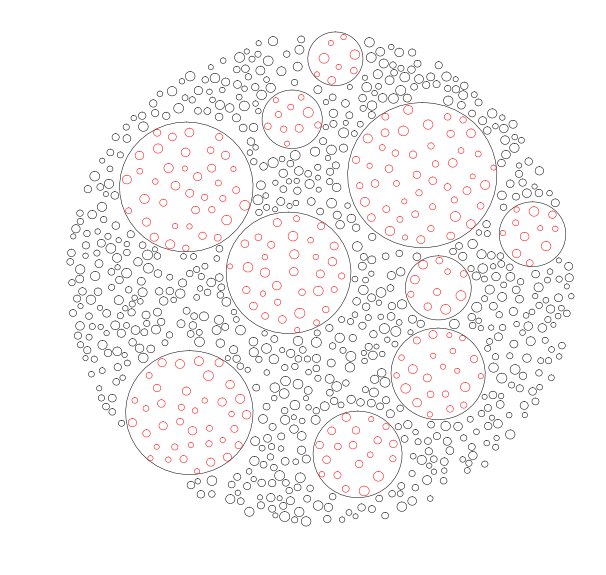

In [120]:
plt.figure(figsize=(10,10))
for c in circles:
    plt.plot(c.points[:,0],c.points[:,1],'k-',lw=0.5)
for c in subCircles:
    plt.plot(c.points[:,0],c.points[:,1],'r-',lw=0.5)
plt.axis('off')
plt.show()

### Random polygon filled with circles

In [113]:
pMin = -450*np.ones(2)
pMax = 450*np.ones(2)
points = randomArray(pMin,pMax,7)
poly = Polygon(points)
#fillPolygon(self,rMin,rMax,spacing,nbCircles,nbIter,listCircles=[])
rMin=1
rMax= 5
spacing = 2
nbCircles = 550
nbIter = 5000

circles =[]
circles =poly.fillPolygon(rMin,rMax,spacing,nbCircles,nbIter,circles)

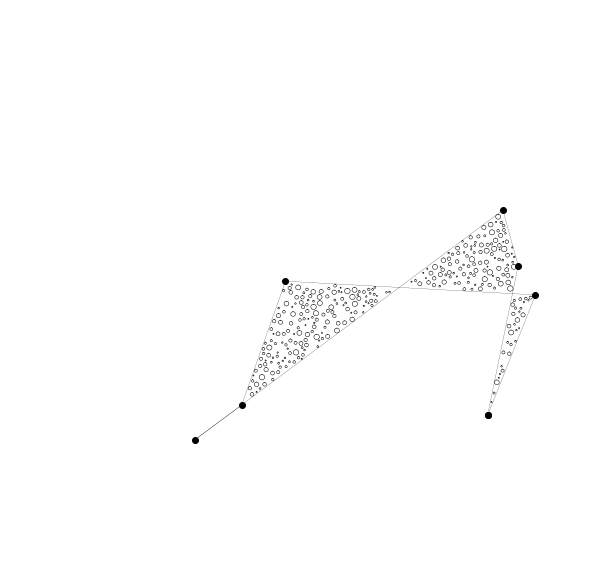

In [114]:
plt.figure(figsize=(10,10))
for c in circles:
    plt.plot(c.points[:,0],c.points[:,1],'k-',lw=0.5)
    
plt.plot(poly.polygon[:,0],poly.polygon[:,1],'ko-',lw=0.2)
plt.axis('off')
plt.xlim([-500,500])
plt.ylim([-500,500])
plt.show()

In [11]:
width = 750
height = 750
padding = 50

pts = []
radii = []
for p in range(5):
    poly = polygon_rand(padding,width-padding,padding,height-padding,random.randint(3,51))
    
    pts,radii = fill_poly(pts,radii,poly,15,35,1,25,500)
    pts,radii = fill_poly(pts,radii,poly,1,10,1,1000,5000)
    
colors = [(22/255,105/255,122/255),(72/255,159/255,181/255),(130/255,192/255,204/255),(255/255,166/255,43/255)]
bg_col = (237/255,231/255,227/255)

ims = cairo.ImageSurface(cairo.FORMAT_ARGB32,width,height)
cr = cairo.Context(ims)
cr.set_source_rgb(*bg_col)
cr.rectangle(0,0,width,height)
cr.fill()

for i in range(len(pts)):
    cr.arc(pts[i][0]+3,pts[i][1]+2, radii[i], 0, 2*math.pi)
    cr.set_source_rgba(22/255,105/255,122/255,0.15)
    cr.fill()
    
    cr.arc(pts[i][0],pts[i][1], radii[i], 0, 2*math.pi)
    cr.set_source_rgba(*random.choices(colors,weights=[0.5,0.4,0.3,0.05])[0],0.95)
    cr.fill()

ims.write_to_png('circles.png')    
IPython.display.Image("circles.png")  # Output to PNG
    

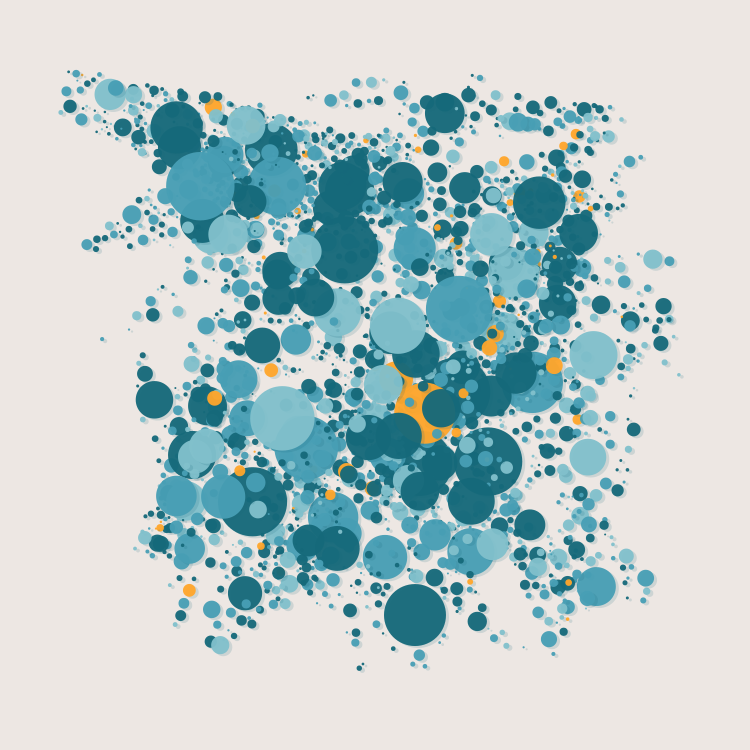

In [55]:
width = 750
height = 750
padding = 50

ptss = []
radiis = []
for p in range(7):
    pts = []
    radii = []
    poly = polygon_rand(padding,width-padding,padding,height-padding,random.randint(3,25))
    
    pts,radii = fill_poly(pts,radii,poly,15,35,1,25,500)
    pts,radii = fill_poly(pts,radii,poly,1,10,1,1000,5000)

    ptss.append(pts)
    radiis.append(radii)
ptss = [item for sublist in ptss for item in sublist]
radiis = [item for sublist in radiis for item in sublist]

colors = [(22/255,105/255,122/255),(72/255,159/255,181/255),(130/255,192/255,204/255),(255/255,166/255,43/255)]
bg_col = (237/255,231/255,227/255)

ims = cairo.ImageSurface(cairo.FORMAT_ARGB32,width,height)
cr = cairo.Context(ims)
cr.set_source_rgb(*bg_col)
cr.rectangle(0,0,width,height)
cr.fill()

for i in range(len(ptss)):
    cr.arc(ptss[i][0]+3,ptss[i][1]+2, radiis[i], 0, 2*math.pi)
    cr.set_source_rgba(22/255,105/255,122/255,0.15)
    cr.fill()
    
    cr.arc(ptss[i][0],ptss[i][1], radiis[i], 0, 2*math.pi)
    cr.set_source_rgba(*random.choices(colors,weights=[0.5,0.4,0.3,0.05])[0],0.95)
    cr.fill()

ims.write_to_png('circles.png')    
IPython.display.Image("circles.png")  # Output to PNG

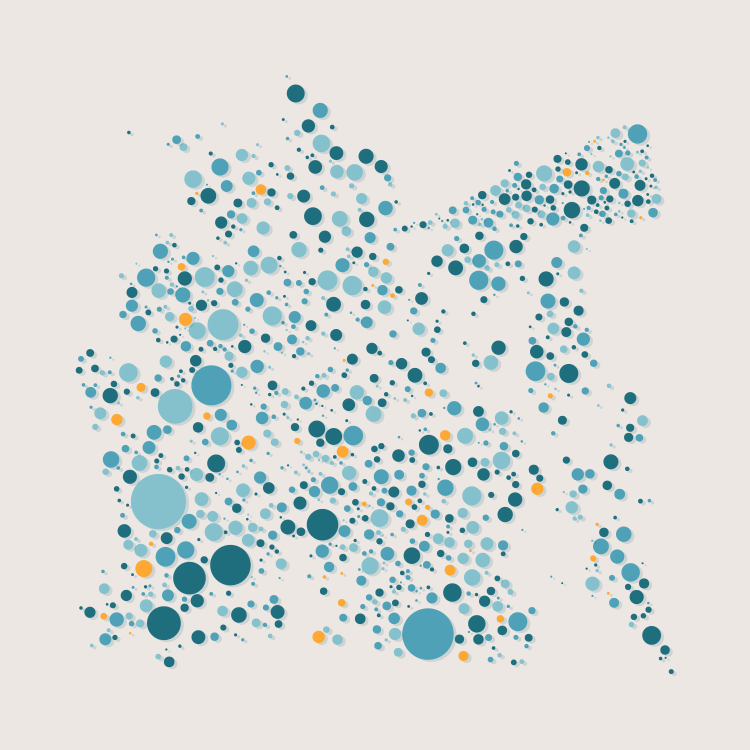

In [56]:
width = 750
height = 750
padding = 50

pts = []
radii = []
for p in range(5):
    poly = polygon_rand(padding,width-padding,padding,height-padding,random.randint(3,51))
    
    pts,radii = fill_poly(pts,radii,poly,15,35,1,25,500)
    pts,radii = fill_poly(pts,radii,poly,1,10,1,1000,5000)
    
colors = [(22/255,105/255,122/255),(72/255,159/255,181/255),(130/255,192/255,204/255),(255/255,166/255,43/255)]
bg_col = (237/255,231/255,227/255)

ims = cairo.ImageSurface(cairo.FORMAT_ARGB32,width,height)
cr = cairo.Context(ims)
cr.set_source_rgb(*bg_col)
cr.rectangle(0,0,width,height)
cr.fill()

for i in range(len(pts)):
    cr.arc(pts[i][0]+3,pts[i][1]+2, radii[i], 0, 2*math.pi)
    cr.set_source_rgba(22/255,105/255,122/255,0.15)
    cr.fill()
    
    cr.arc(pts[i][0],pts[i][1], radii[i], 0, 2*math.pi)
    cr.set_source_rgba(*random.choices(colors,weights=[0.5,0.4,0.3,0.05])[0],0.95)
    cr.fill()

ims.write_to_png('circles.png')    
IPython.display.Image("circles.png")  # Output to PNG

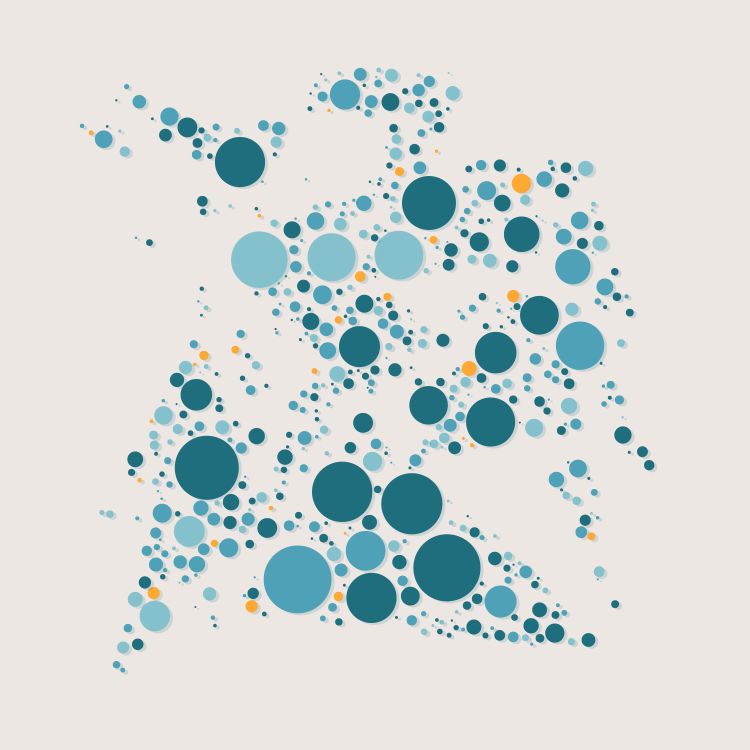

In [57]:
width = 750
height = 750
padding = 50

pts = []
radii = []

poly = polygon_rand(padding,width-padding,padding,height-padding,54)
pts,radii = fill_poly(pts,radii,poly,15,35,1,25,500)
pts,radii = fill_poly(pts,radii,poly,1,10,1,1000,5000)
    
colors = [(22/255,105/255,122/255),(72/255,159/255,181/255),(130/255,192/255,204/255),(255/255,166/255,43/255)]
bg_col = (237/255,231/255,227/255)

ims = cairo.ImageSurface(cairo.FORMAT_ARGB32,width,height)
cr = cairo.Context(ims)
cr.set_source_rgb(*bg_col)
cr.rectangle(0,0,width,height)
cr.fill()

for i in range(len(pts)):
    cr.arc(pts[i][0]+3,pts[i][1]+2, radii[i], 0, 2*math.pi)
    cr.set_source_rgba(22/255,105/255,122/255,0.15)
    cr.fill()
    
    cr.arc(pts[i][0],pts[i][1], radii[i], 0, 2*math.pi)
    cr.set_source_rgba(*random.choices(colors,weights=[0.5,0.4,0.3,0.05])[0],0.95)
    cr.fill()

ims.write_to_png('circles.png')    
IPython.display.Image("circles.png")  # Output to PNG